In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/timeseries/tesla.csv
/kaggle/input/timeseries/Google_test_data.csv
/kaggle/input/timeseries/Google_train_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data = pd.read_csv('/kaggle/input/timeseries/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
data['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [7]:
data['Close'] = pd.to_numeric(data.Close, errors='coerce')
data.Close

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [9]:
data.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close     109
Volume      0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [13]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [14]:
trainData = data.iloc[:,4:5].values

In [15]:
trainData

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

# MinMaxScaler
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [16]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData

array([[0.40001392],
       [0.40665027],
       [0.38520976],
       ...,
       [0.68184982],
       [0.67660572],
       [0.65115092]])

In [17]:
trainData.shape

(1149, 1)

In [18]:
X_train = []
y_train = []
for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

In [19]:
X_train[0]

array([0.40001392, 0.40665027, 0.38520976, 0.36439577, 0.30063115,
       0.30218582, 0.30872935, 0.31724522, 0.30647856, 0.31478559,
       0.32480973, 0.34021719, 0.21623817, 0.21514758, 0.20452014,
       0.17804437, 0.17481901, 0.20231576, 0.19702525, 0.20261741,
       0.2042881 , 0.21419621, 0.2401615 , 0.269677  , 0.26431687,
       0.2714405 , 0.27517635, 0.26232133, 0.27687024, 0.27123167,
       0.26150919, 0.26373677, 0.25937442, 0.28104696, 0.26703174,
       0.26278541, 0.27155652, 0.27018749, 0.29121032, 0.29088547,
       0.30049193, 0.29782346, 0.28162707, 0.26011695, 0.26438649,
       0.26517542, 0.24923427, 0.26055782, 0.28979488, 0.28564136,
       0.29754502, 0.30659458, 0.32726935, 0.32615556, 0.34116855,
       0.35520698, 0.3472016 , 0.36279469, 0.35745777, 0.37766846])

In [20]:
y_train[0]

0.36065992203452746

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train[0]

array([0.40001392, 0.40665027, 0.38520976, 0.36439577, 0.30063115,
       0.30218582, 0.30872935, 0.31724522, 0.30647856, 0.31478559,
       0.32480973, 0.34021719, 0.21623817, 0.21514758, 0.20452014,
       0.17804437, 0.17481901, 0.20231576, 0.19702525, 0.20261741,
       0.2042881 , 0.21419621, 0.2401615 , 0.269677  , 0.26431687,
       0.2714405 , 0.27517635, 0.26232133, 0.27687024, 0.27123167,
       0.26150919, 0.26373677, 0.25937442, 0.28104696, 0.26703174,
       0.26278541, 0.27155652, 0.27018749, 0.29121032, 0.29088547,
       0.30049193, 0.29782346, 0.28162707, 0.26011695, 0.26438649,
       0.26517542, 0.24923427, 0.26055782, 0.28979488, 0.28564136,
       0.29754502, 0.30659458, 0.32726935, 0.32615556, 0.34116855,
       0.35520698, 0.3472016 , 0.36279469, 0.35745777, 0.37766846])

In [23]:
y_train[0]

0.36065992203452746

In [24]:
X_train.shape

(1089, 60)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1089, 60, 1)

In [26]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
          
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0280 - 16s/epoch - 449ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0102 - 7s/epoch - 197ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0093 - 7s/epoch - 195ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0095 - 7s/epoch - 195ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0083 - 7s/epoch - 202ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0078 - 7s/epoch - 198ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0081 - 7s/epoch - 195ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0057 - 7s/epoch - 194ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 193ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0057 - 7s/epoch - 205ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 195ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 196ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 195ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0050 - 7s/epoch - 194ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0052 - 7s/epoch - 202ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0049 - 7s/epoch - 193ms/step
Epoch 17/20
35/

In [28]:
hist.history['loss']

[0.02801283448934555,
 0.010198261588811874,
 0.00927661545574665,
 0.009535917080938816,
 0.008322376757860184,
 0.00775145273655653,
 0.008102926425635815,
 0.005722937639802694,
 0.0059504141099750996,
 0.005738020874559879,
 0.006760858930647373,
 0.0053170365281403065,
 0.006373237818479538,
 0.0049863699823617935,
 0.005221486557275057,
 0.004910909105092287,
 0.004224459175020456,
 0.004549031611531973,
 0.004714389331638813,
 0.004168166313320398]

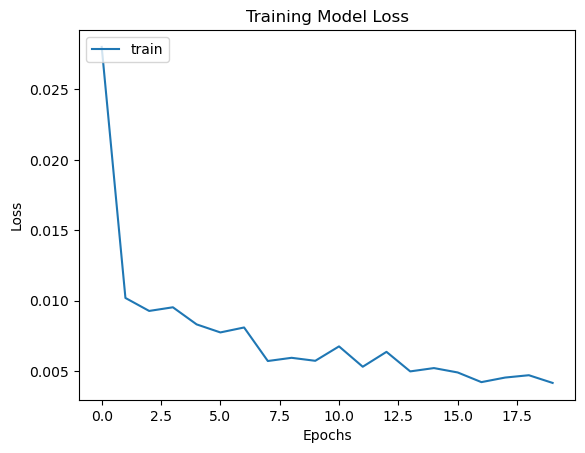

In [29]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
testData = pd.read_csv('/kaggle/input/timeseries/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [31]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 50ms/step


array([[1.1342465],
       [1.1361727],
       [1.1482445],
       [1.1657585],
       [1.1771314],
       [1.170837 ],
       [1.1505206],
       [1.1281917],
       [1.1177459],
       [1.1192521],
       [1.1153417],
       [1.1051391],
       [1.0963713],
       [1.0884151],
       [1.089174 ],
       [1.0966902],
       [1.1189663],
       [1.1505541],
       [1.1831235],
       [1.2122813],
       [1.2160388],
       [1.202383 ],
       [1.1725446],
       [1.1383251],
       [1.1135249],
       [1.1058078],
       [1.1116472],
       [1.11819  ],
       [1.1129491],
       [1.1015906],
       [1.088711 ],
       [1.0742824],
       [1.0523261],
       [1.026146 ],
       [1.0201696],
       [1.0373914],
       [1.0658131],
       [1.0928693],
       [1.1143829],
       [1.1195837],
       [1.1263053],
       [1.1379585],
       [1.1536721],
       [1.1682845],
       [1.1767452],
       [1.1743466],
       [1.1602246],
       [1.1505967],
       [1.1511061],
       [1.1618891],


In [32]:
predicted_price = sc.inverse_transform(y_pred)

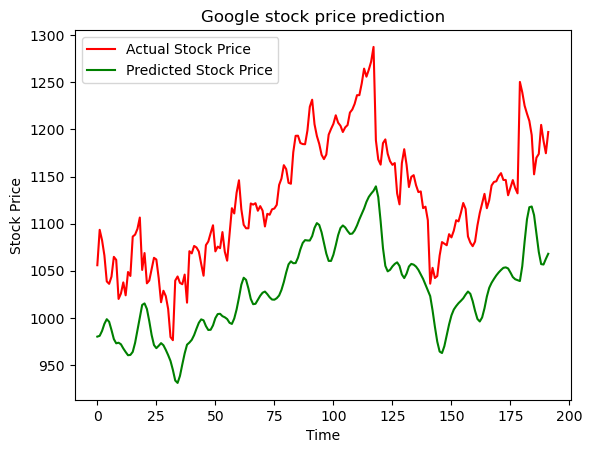

In [33]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()